# Análisis de Sentimiento 

# Instalar Dependencias Necesarias

- Verificación del entorno y librerías instaladas:

Paquetes clave para análisis de datos:

pandas: 2.2.3 (actualizado y funcional).

numpy: 1.26.4 (última versión compatible).

scikit-learn: 1.5.2 (apropiado para machine learning).

matplotlib y seaborn: 3.9.2 y 0.13.2 respectivamente, para visualización de datos.

- Frameworks para machine learning y deep learning:

torch: 2.5.1+cu124 (versión con soporte CUDA 12.4).

transformers: 4.47.1, para modelado de lenguaje y análisis avanzado.

tokenizers: 0.21.0, optimizado para procesamiento de texto.

- PyTorch:

Versión instalada: 2.5.1+cu124.
Soporte CUDA: Indicado como compatible con la versión 12.4, pero actualmente no detecta acceso a GPU (torch.cuda.is_available() devuelve False).

- Librerías adicionales para análisis de texto:

nltk: Instalado correctamente (versión 3.9.1), utilizable para procesamiento de texto clásico.

huggingface-hub: Puede facilitar la gestión de modelos preentrenados para tareas de NLP.

# DistilBERT

Características DistilBERT: 

Tamaño del modelo 66 millones de parámetros

Velocidad de inferencia	~60% más rápida

Uso de memoria Más bajo (~250 MB por modelo)

Requisitos computacionales	Más ligero, ideal para CPU

Precisión Ligeramente menor (~97% de la precisión de BERT)


Ventajas de DistilBERT 

- Menor uso de recursos: Consume menos memoria y procesamiento, lo que lo hace más eficiente para máquinas sin GPU.
- Velocidad mejorada: La inferencia es significativamente más rápida, ideal para grandes volúmenes de texto.
- Simplicidad: Es más fácil de implementar y configurar para tareas como el análisis de sentimientos.
- Precisión aceptable: Aunque es más pequeño, mantiene un desempeño comparable con BERT Base para la mayoría de las tareas.

Cargar y Procesar el Dataset

In [1]:
import pandas as pd

# Cargar el dataset
file_path = "reviews_preprocessed.csv"  # Reemplaza con la ruta a tu archivo CSV
data = pd.read_csv(file_path)

# Mostrar información general
print(f"Número total de datos en el dataset: {len(data)}")
print("Nombres de todas las columnas en el dataset:")
print(data.columns.tolist())


Número total de datos en el dataset: 1465863
Nombres de todas las columnas en el dataset:
['id_user', 'id_business', 'review_rating', 'review_text', 'review_date', 'id', 'year', 'cleaned_text', 'no_stopwords_text', 'processed_text']


Carga del modelo DistilBERT

In [2]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

In [3]:
# Configurar el modelo y dispositivo
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    device=-1  # -1 asegura que se use CPU
)

Device set to use cpu


In [4]:
# Función para procesar texto en lotes
def analyze_sentiments_in_batches(texts, batch_size=32):
    sentiments = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Procesando lotes"):
        batch = texts[i:i + batch_size]
        results = sentiment_analyzer(batch)
        sentiments.extend([result["label"] for result in results])
    return sentiments

In [5]:
# Cargar el dataset
file_path = "reviews_preprocessed.csv"  # Reemplaza con la ruta a tu archivo CSV
data = pd.read_csv(file_path)

In [6]:
# Seleccionar las columnas necesarias
columns_to_keep = ['id_user', 'id_business', 'review_rating', 'review_date', 'id', 'year', 'processed_text']
data = data[columns_to_keep]

In [7]:
# Asegurar que la columna de texto esté presente
text_column = "processed_text"  # Ajusta al nombre real de la columna en tu archivo
if text_column not in data.columns:
    raise ValueError(f"La columna '{text_column}' no se encuentra en el archivo CSV.")

In [8]:
# Limitar el dataset a los primeros 10000 registros
data = data.head(10000)

In [9]:
# Preparar la columna de texto
texts = data[text_column].fillna("").astype(str).tolist()

In [10]:
# Aplicar análisis de sentimiento por lotes
print("Iniciando análisis de sentimiento para 10000 registros...")
data["sentiment"] = analyze_sentiments_in_batches(texts, batch_size=32)

Iniciando análisis de sentimiento para 10000 registros...


Procesando lotes: 100%|██████████| 313/313 [12:49<00:00,  2.46s/it]


In [11]:
# Guardar resultados en un nuevo archivo
output_file = "sentiment_analysis_results1_10000.csv"
data.to_csv(output_file, index=False)
print(f"Análisis completado. Resultados guardados en {output_file}")

Análisis completado. Resultados guardados en sentiment_analysis_results1_10000.csv


# Resultados obtenidos en el Analisis de Sentimiento:

In [13]:
# Cargar el dataset
file_path = "sentiment_analysis_results1_10000.csv"
data = pd.read_csv(file_path)

# Verificar las primeras filas
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
   id_user                            id_business  review_rating  \
0        1  0x8894b5a7a7909725:0xe4687299fd288188              5   
1        2  0x8894b5a7a7909725:0xe4687299fd288188              1   
2        3  0x8894b5a7a7909725:0xe4687299fd288188              5   
3        4  0x8894b5a7a7909725:0xe4687299fd288188              5   
4        5  0x8894b5a7a7909725:0xe4687299fd288188              5   

               review_date  id  year  \
0  2018-09-17 14:51:08.022   1  2018   
1  2018-09-20 00:12:47.631   2  2018   
2  2018-08-22 11:13:16.392   3  2018   
3  2019-04-17 01:25:32.274   4  2019   
4  2019-05-20 22:42:50.993   5  2019   

                                      processed_text sentiment  
0  salad lackluster though well written descripti...  NEGATIVE  
1  love place great little restaurant unique dish...  POSITIVE  
2  classy restaurant match charm inn make reserva...  POSITIVE  
3                         great atmosphere good food  POSITIVE

In [14]:
# Resumen general de los sentimientos
print("\nDistribución de sentimientos:")
sentiment_summary = data['sentiment'].value_counts()
print(sentiment_summary)


Distribución de sentimientos:
sentiment
POSITIVE    7482
NEGATIVE    2518
Name: count, dtype: int64


In [15]:
# Porcentaje de sentimientos
print("\nPorcentaje de sentimientos:")
sentiment_percentage = data['sentiment'].value_counts(normalize=True) * 100
print(sentiment_percentage)


Porcentaje de sentimientos:
sentiment
POSITIVE    74.82
NEGATIVE    25.18
Name: proportion, dtype: float64


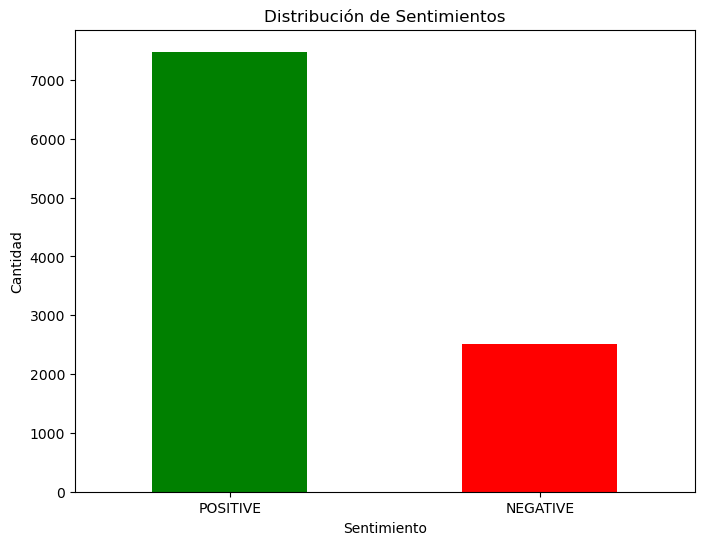

In [16]:
import matplotlib.pyplot as plt

# Gráfico de barras para la distribución de sentimientos
plt.figure(figsize=(8, 6))
sentiment_summary.plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


Distribución de sentimientos por año:
sentiment  NEGATIVE  POSITIVE
year                         
2006            1.0       1.0
2008            1.0       NaN
2009            1.0       1.0
2010            3.0       5.0
2011            2.0      13.0
2012           10.0      17.0
2013            7.0      41.0
2014            9.0      43.0
2015           26.0      74.0
2016          123.0     314.0
2017          282.0     972.0
2018          596.0    1816.0
2019          754.0    2150.0
2020          412.0    1184.0
2021          291.0     851.0


<Figure size 1000x600 with 0 Axes>

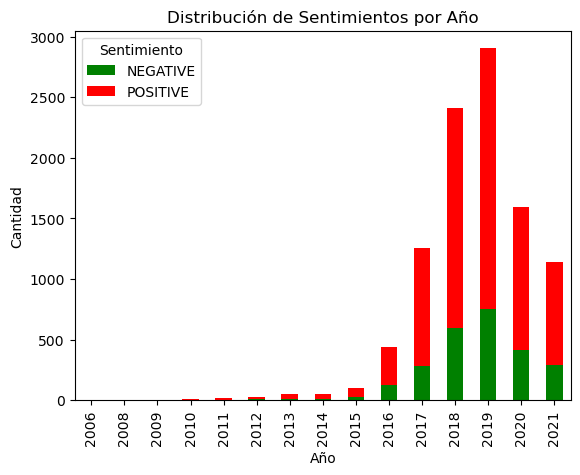

In [17]:
# Distribución de sentimientos por año
sentiment_by_year = data.groupby(['year', 'sentiment']).size().unstack()
print("\nDistribución de sentimientos por año:")
print(sentiment_by_year)

plt.figure(figsize=(10, 6))
sentiment_by_year.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Distribución de Sentimientos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Sentimiento')
plt.show()


Distribución de sentimientos por calificación:
sentiment      NEGATIVE  POSITIVE
review_rating                    
1                   723        66
2                   414       121
3                   509       492
4                   375      1587
5                   497      5216


<Figure size 1000x600 with 0 Axes>

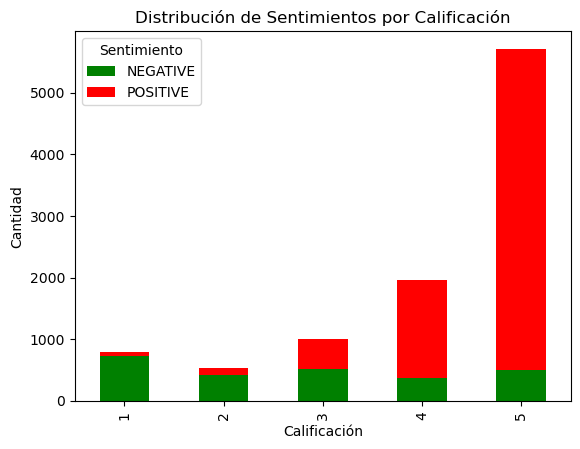

In [18]:
# Relación entre calificación (review_rating) y sentimiento
sentiment_by_rating = data.groupby(['review_rating', 'sentiment']).size().unstack()
print("\nDistribución de sentimientos por calificación:")
print(sentiment_by_rating)

plt.figure(figsize=(10, 6))
sentiment_by_rating.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Distribución de Sentimientos por Calificación')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.legend(title='Sentimiento')
plt.show()

In [19]:
# Mostrar las 10 primeras filas de cada tipo de sentimiento
print("\nEjemplos de reviews POSITIVE:")
print(data[data['sentiment'] == 'POSITIVE'].head(10))

print("\nEjemplos de reviews NEGATIVE:")
print(data[data['sentiment'] == 'NEGATIVE'].head(10))



Ejemplos de reviews POSITIVE:
    id_user                            id_business  review_rating  \
1         2  0x8894b5a7a7909725:0xe4687299fd288188              1   
2         3  0x8894b5a7a7909725:0xe4687299fd288188              5   
3         4  0x8894b5a7a7909725:0xe4687299fd288188              5   
4         5  0x8894b5a7a7909725:0xe4687299fd288188              5   
5         6  0x8894b5a7a7909725:0xe4687299fd288188              5   
6         1   0x88f5a178d51075bd:0x85daa2b989c538c              1   
8    199968   0x88f5a178d51075bd:0x85daa2b989c538c              5   
9    260166   0x88f5a178d51075bd:0x85daa2b989c538c              5   
10   200303   0x88f5a178d51075bd:0x85daa2b989c538c              4   
11   206694   0x88f5a178d51075bd:0x85daa2b989c538c              3   

                review_date  id  year  \
1   2018-09-20 00:12:47.631   2  2018   
2   2018-08-22 11:13:16.392   3  2018   
3   2019-04-17 01:25:32.274   4  2019   
4   2019-05-20 22:42:50.993   5  2019   
5   